In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [3]:
data = datasets.load_iris()
X = data.data
y = data.target

In [7]:
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

In [8]:
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


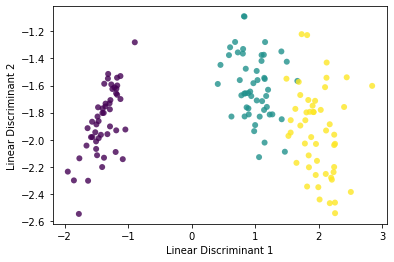

In [10]:
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.show()

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

import time

In [9]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
start_time = time.time()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
duration = time.time() - start_time

print("Training time: ", duration)
print("Confusion matrix: ")
print(cm(y_test, preds))
print("Metrics: ")
print(cr(y_test, preds))
print("Accuracy: ", np.sum(preds == y_test)/len(y_test))

Training time:  0.03464841842651367
Confusion matrix: 
[[11  0  0]
 [ 0  5  0]
 [ 0  2 12]]
Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.71      1.00      0.83         5
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.90      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

Accuracy:  0.9333333333333333


In [22]:
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)
print(X_projected.shape)
print(X_projected)

(150, 2)
[[-1.49920971 -1.88675441]
 [-1.2643595  -1.59214275]
 [-1.35525305 -1.73341462]
 [-1.18495616 -1.62358806]
 [-1.5169559  -1.94476227]
 [-1.40864014 -2.20148038]
 [-1.28548339 -1.90177269]
 [-1.38431399 -1.80218401]
 [-1.12136823 -1.53021571]
 [-1.31831374 -1.54860234]
 [-1.58367182 -1.98077996]
 [-1.28716445 -1.77562146]
 [-1.31422036 -1.51454424]
 [-1.37605297 -1.58704672]
 [-1.94923317 -2.23514437]
 [-1.77516687 -2.54725756]
 [-1.63024483 -2.302505  ]
 [-1.42847467 -1.96369972]
 [-1.50337736 -2.06783361]
 [-1.48893461 -2.11442674]
 [-1.35700838 -1.75428449]
 [-1.3795792  -2.13271099]
 [-1.65506386 -2.0431741 ]
 [-1.04356034 -1.92449977]
 [-1.12096094 -1.699853  ]
 [-1.17443134 -1.54228363]
 [-1.18744274 -1.93081847]
 [-1.46468272 -1.86215146]
 [-1.48146353 -1.82874656]
 [-1.18904953 -1.65764616]
 [-1.17130335 -1.5996383 ]
 [-1.32634064 -1.95868741]
 [-1.76713997 -2.13717248]
 [-1.85304902 -2.29999459]
 [-1.2475787  -1.62554765]
 [-1.47327677 -1.76063036]
 [-1.63810761 -1.91

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2)

In [43]:
start_time = time.time()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(3, 3), random_state=1)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
duration = time.time() - start_time

print("Training time: ", duration)
print("Confusion matrix: ")
print(cm(y_test, preds))
print("Metrics: ")
print(cr(y_test, preds))
print("Accuracy: ", np.sum(preds == y_test)/len(y_test))

Training time:  0.020943403244018555
Confusion matrix: 
[[ 8  0  0]
 [ 0  8  2]
 [ 0  0 12]]
Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.80      0.89        10
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30

Accuracy:  0.9333333333333333


In [35]:
start_time = time.time()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_projected)
duration = time.time() - start_time
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
preds = kmeans.predict(X_test)

In [37]:
print("Training time: ", duration)
print("Confusion matrix: ")
print(cm(y_test, preds))
print("Metrics: ")
print(cr(y_test, preds))
print("Accuracy: ", np.sum(preds == y_test)/len(y_test))

Training time:  0.0189816951751709
Confusion matrix: 
[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]
Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy:  0.9666666666666667
